In [4]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import scipy as sp
import scipy.stats
from scipy.stats import norm,rayleigh

import pylab
import datetime

from tkinter import *
from tkinter import filedialog

from numpy import array, polyfit, poly1d
from pandas import DataFrame, to_datetime

In [5]:
def get_file():

# Select input file
    root = Tk()
    root.filename =  filedialog.askopenfilename(initialdir = "C:\QGHL\Wave_data", title = "Select PRIM master file",\
                        filetypes = (("Prim files","*.prim"),("Seco files","*.seco"),("all files","*.*")))
    root.destroy()

    return(root.filename)

In [6]:
############################################
#    MAIN PROGRAM
############################################

# Create a DT based on the structure type of the PRIM Master File
# Details copied from PV~Wave file Master_structure_types_corrected.pro
pp1 = np.dtype([
    ('P1', 'B'),('P2', 'B'),('P3', 'B'),('P4', 'B'),('P5', 'B'),('P6', 'B'),('P7', 'B'),('P8', 'B'),
    ('P9', 'B'),('P10', 'B'),('P11', 'B'),('P12', 'B')])
pp2 = np.dtype([('p1', 'f'),('p2', 'f'),('p3', 'f'),('p4', 'f')])

rectype = np.dtype([
    ('Procid',pp1),
    ('Loc','i'),
    ('Year','i'),('Month','i'),('Day', 'i'),('Hour', 'i'),('Min', 'i'), ('Sec','i'), 
    ('Hsig','f'), ('Thsig','f'), ('Hrms', 'f'), ('Hmax', 'f'),('Tc', 'f'),('Tz', 'f'), ('H10', 'f'), 
    ('Th10', 'f'), ('Thmax', 'f'), ('Tzmax', 'f'), ('Hm0', 'f'),('T02', 'f'),('Tp', 'f'), ('EPS', 'f'), 
    ('Npts', 'i'),
    ('Param2',pp2)])

# Get name of input PRIM file
Input_Prim_File = get_file()

# Open file
f = open(Input_Prim_File)

# Read data from the Binary file into a DF based on the structure in the DT
recs = DataFrame(np.fromfile(f, rectype))

# Convert date/time column data into Dates and times
Record_time = pd.DataFrame({'Year': recs.Year,'month': recs.Month,'day': recs.Day,'hour': recs.Hour,\
                            'minute': recs.Min,'second': recs.Sec})

# Found an issue in the Townsville Master File - some year data for 1998 entered as 98
#    - this caused problems with date conversion!
Record_time['Year'] = np.where(Record_time.Year < 1900, 1998, Record_time.Year) # <---- Needed this for Townsville

# Insert Date column at start of DF
recs.insert(0, 'Date', pd.to_datetime(Record_time))

# Remove unwanted columns from the DF
recs = recs.drop(columns=[
    'Procid',
    'Loc',
    'Year','Month','Day','Hour','Min','Sec',
    'Param2'], axis=1)

print('Finished')


Finished


In [12]:
data = recs[['Hsig', 'Hmax', 'Tz', 'Tp']]

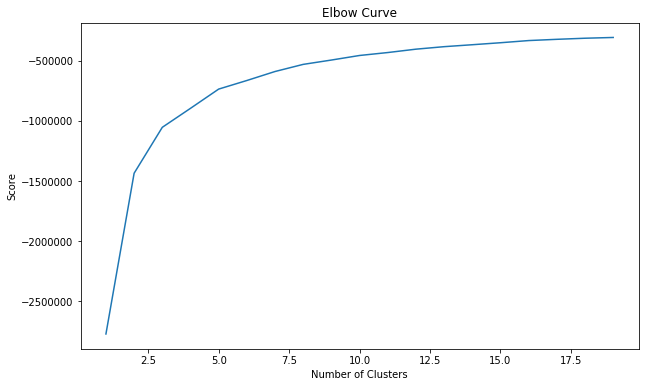

In [23]:
from sklearn.cluster import KMeans

n_cluster = range(1, 20)
kmeans = [KMeans(n_clusters=i).fit(data[0:10000]) for i in n_cluster]
scores = [kmeans[i].score(data) for i in range(len(kmeans))]

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(n_cluster, scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show();

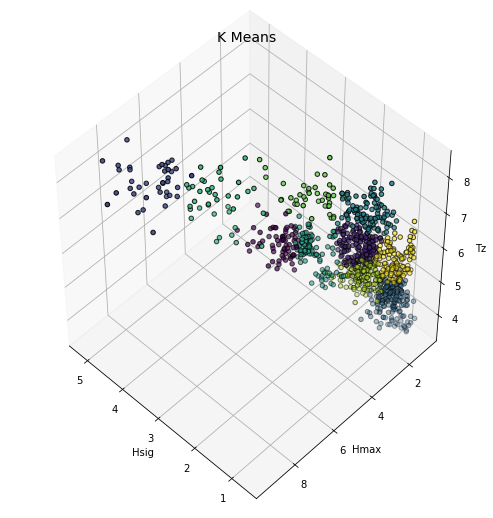

In [25]:
from mpl_toolkits.mplot3d import Axes3D

X = recs[['Hsig', 'Hmax', 'Tz']]
X = X[1:1000]
X = X.reset_index(drop=True)
km = KMeans(n_clusters=10)
km.fit(X)
km.predict(X)
labels = km.labels_
#Plotting
fig = plt.figure(1, figsize=(7,7))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2],
          c=labels.astype(np.float), edgecolor="k")
ax.set_xlabel("Hsig")
ax.set_ylabel("Hmax")
ax.set_zlabel("Tz")
plt.title("K Means", fontsize=14);